In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv("./AAPL.csv")

In [3]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
split = int(df.shape[0] * 0.7)

In [7]:
df.shape

(2517, 7)

In [8]:
open_price = df.values[:, 1]

In [10]:
training_set = open_price[:split]
test_set = open_price[split:]

In [13]:
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(open_price.reshape(-1, 1))
LOOKBACK = 24
X_train = []
y_train = []
for i in range(LOOKBACK, training_set.shape[0]):
    X_train.append(training_set_scaled[i-LOOKBACK:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [19]:
model = Sequential()

model.add(LSTM(units = 12, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 12, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))


model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
55/55 [==============================] - 3s 56ms/step - loss: 0.0379 - accuracy: 5.7571e-04
Epoch 2/100
55/55 [==============================] - 3s 60ms/step - loss: 0.0154 - accuracy: 5.7571e-04
Epoch 3/100
55/55 [==============================] - 4s 65ms/step - loss: 0.0135 - accuracy: 5.7571e-04
Epoch 4/100
55/55 [==============================] - 4s 73ms/step - loss: 0.0123 - accuracy: 5.7571e-04
Epoch 5/100
55/55 [==============================] - 4s 70ms/step - loss: 0.0115 - accuracy: 5.7571e-04
Epoch 6/100
55/55 [==============================] - 4s 72ms/step - loss: 0.0113 - accuracy: 5.7571e-04
Epoch 7/100
55/55 [==============================] - 3s 61ms/step - loss: 0.0107 - accuracy: 5.7571e-04
Epoch 8/100
55/55 [==============================] - 3s 62ms/step - loss: 0.0103 - accuracy: 5.7571e-04
Epoch 9/100
55/55 [==============================] - 3s 63ms/step - loss: 0.0101 - accuracy: 5.7571e-04
Epoch 10/100
55/55 [==============================] - 4s 67ms/st

55/55 [==============================] - 4s 68ms/step - loss: 0.0082 - accuracy: 5.7571e-04
Epoch 80/100
55/55 [==============================] - 4s 66ms/step - loss: 0.0083 - accuracy: 5.7571e-04
Epoch 81/100
55/55 [==============================] - 4s 73ms/step - loss: 0.0082 - accuracy: 5.7571e-04
Epoch 82/100
55/55 [==============================] - 4s 72ms/step - loss: 0.0083 - accuracy: 5.7571e-04
Epoch 83/100
55/55 [==============================] - 4s 67ms/step - loss: 0.0081 - accuracy: 5.7571e-04
Epoch 84/100
55/55 [==============================] - 4s 72ms/step - loss: 0.0082 - accuracy: 5.7571e-04
Epoch 85/100
55/55 [==============================] - 4s 73ms/step - loss: 0.0078 - accuracy: 5.7571e-04
Epoch 86/100
55/55 [==============================] - 4s 67ms/step - loss: 0.0079 - accuracy: 5.7571e-04
Epoch 87/100
55/55 [==============================] - 4s 74ms/step - loss: 0.0080 - accuracy: 5.7571e-04
Epoch 88/100
55/55 [==============================] - 4s 80ms/step -

In [21]:
total_len = open_price.shape[0]
actual_values = open_price[LOOKBACK:]
inputs = open_price.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(LOOKBACK, total_len):
    X_test.append(inputs[i-LOOKBACK:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(2493, 24, 1)


In [27]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

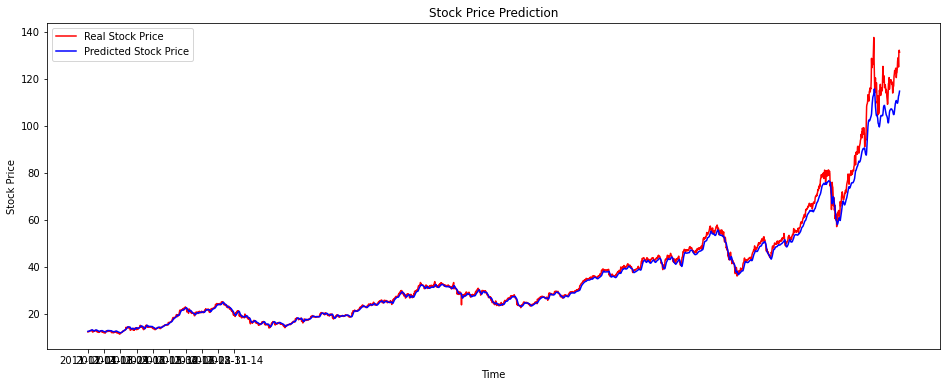

In [29]:
plt.figure(figsize=(16,6))
plt.plot(df.loc[LOOKBACK:, "Date"], actual_values, color = "red", label = "Real Stock Price")
plt.plot(df.loc[LOOKBACK:, "Date"], predicted_stock_price, color = "blue", label = "Predicted Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [30]:
model.save('./model.h5')